In [21]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [22]:
import pandas as pd

# 加载数据集 世界麻疹疫苗接种率」
url = 'https://cdn.aibydoing.com/hands-on-ai/files/course-6-vaccine.csv'
storage_options = {'User-Agent': 'Mozilla/5.0'}
df = pd.read_csv(url, storage_options=storage_options)
df

,Year,Values
0,1983,48.676809
1,1984,50.653151
2,1985,45.603729
3,1986,45.511160
4,1987,52.882892
5,1988,62.710162
6,1989,68.354736
7,1990,73.618808
8,1991,69.748838
9,1992,69.905091


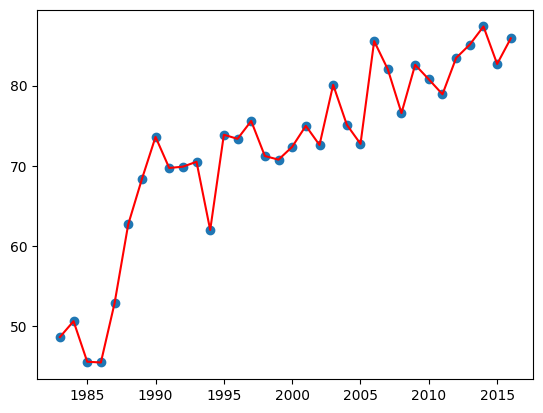

In [23]:
# 将数据绘制成图表

# 定义 x, y 的取值
x = df["Year"]
y = df["Values"]
# 绘图
plt.plot(x, y, "r")
plt.scatter(x, y)

训练 线性回归模型

In [24]:
# 首先划分 dateframe 为训练集和测试集
train_df = df[: int(len(df) * 0.7)]
test_df = df[int(len(df) * 0.7) :]

# 定义训练和测试使用的自变量和因变量
X_train = train_df["Year"].values
y_train = train_df["Values"].values

X_test = test_df["Year"].values
y_test = test_df["Values"].values

In [25]:
# 建立线性回归模型
model = LinearRegression()
model.fit(X_train.reshape(len(X_train), 1), y_train.reshape(len(y_train), 1))
results = model.predict(X_test.reshape(len(X_test), 1))
results  # 线性回归模型在测试集上的预测结果

array([[81.83437635],
       [83.09935437],
       [84.36433239],
       [85.62931041],
       [86.89428843],
       [88.15926645],
       [89.42424447],
       [90.68922249],
       [91.95420051],
       [93.21917853],
       [94.48415655]])

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print("线性回归平均绝对误差: ", mean_absolute_error(y_test, results.flatten()))
print("线性回归均方误差: ", mean_squared_error(y_test, results.flatten()))

线性回归平均绝对误差:  6.011979515629812
线性回归均方误差:  43.531858295153434


训练 2 次多项式回归模型

In [27]:
# 2 次多项式回归特征矩阵
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
poly_X_train_2 = poly_features_2.fit_transform(X_train.reshape(len(X_train), 1))
poly_X_test_2 = poly_features_2.fit_transform(X_test.reshape(len(X_test), 1))

# 2 次多项式回归模型训练与预测
model = LinearRegression()
model.fit(poly_X_train_2, y_train.reshape(len(X_train), 1))  # 训练模型

results_2 = model.predict(poly_X_test_2)  # 预测结果

results_2.flatten()  # 打印扁平化后的预测结果

array([71.98010746, 70.78151826, 69.38584368, 67.79308372, 66.00323838,
       64.01630767, 61.83229158, 59.45119011, 56.87300326, 54.09773104,
       51.12537344])

In [28]:
print("2 次多项式回归平均绝对误差: ", mean_absolute_error(y_test, results_2.flatten()))
print("2 次多项式均方误差: ", mean_squared_error(y_test, results_2.flatten()))

2 次多项式回归平均绝对误差:  19.792070829572946
2 次多项式均方误差:  464.32903847534686


此数据集 线性回归模型的预测结果 要优于 2次多项式回归模型的预测结果

In [29]:
from sklearn.pipeline import make_pipeline

X_train = X_train.reshape(len(X_train), 1)
X_test = X_test.reshape(len(X_test), 1)
y_train = y_train.reshape(len(y_train), 1)

for m in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)
    pre_y = model.predict(X_test)
    print("{} 次多项式回归平均绝对误差: ".format(m), mean_absolute_error(y_test, pre_y.flatten()))
    print("{} 次多项式均方误差: ".format(m), mean_squared_error(y_test, pre_y.flatten()))
    print("---")

3 次多项式回归平均绝对误差:  4.547692030677687
3 次多项式均方误差:  29.933057420285273
---
4 次多项式回归平均绝对误差:  4.424398084402177
4 次多项式均方误差:  29.02940070116114
---
5 次多项式回归平均绝对误差:  4.341616857646972
5 次多项式均方误差:  28.221932647958223
---


3，4，5 次多项式回归的结果 均优于 线性回归模型

多项式回归预测次数选择？
选择一个误差指标，例如这里选择 MSE，然后计算出该指标随多项式次数增加而变化的图像

MSE 计算结果:  [43.531858295153434, 464.32903847534686, 29.933057420285273, 29.02940070116114, 28.221932647958223, 27.440821643005446, 26.712320051116773, 26.038729592942772, 25.422418053695605, 24.86581840902298]


Text(0, 0.5, 'MSE')

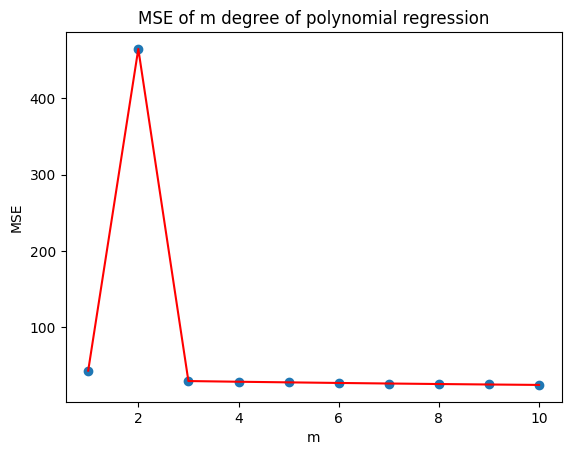

In [30]:
# 计算 m 次多项式回归预测结果的 MSE 评价指标并绘图
mse = []  # 用于存储各最高次多项式 MSE 值
m = 1  # 初始 m 值
m_max = 10  # 设定最高次数
while m <= m_max:
    model = make_pipeline(PolynomialFeatures(m, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)  # 训练模型
    pre_y = model.predict(X_test)  # 测试模型
    mse.append(mean_squared_error(y_test, pre_y.flatten()))  # 计算 MSE
    m = m + 1

print("MSE 计算结果: ", mse)
# 绘图
plt.plot([i for i in range(1, m_max + 1)], mse, "r")
plt.scatter([i for i in range(1, m_max + 1)], mse)

# 绘制图名称等
plt.title("MSE of m degree of polynomial regression")
plt.xlabel("m")
plt.ylabel("MSE")

MSE 值在 2次多项式回归预测时达到最高点，之后趋于平稳下降
所以，避免出现过拟合选3就好